In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
from sklearn.neighbors import NearestNeighbors
import bigfloat
from decimal import *
import methods


# Lorentz equations

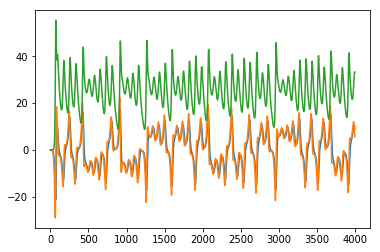

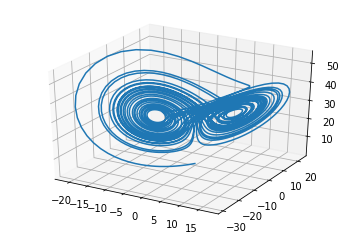

In [2]:
# Parameters
T=4000 #sequence size
sigma=10
beta=8/3
rho=28
dt=0.01

x=np.zeros((T+1))
y=np.zeros((T+1))
z=np.zeros((T+1))
x[0]=0.2*(np.random.rand()-0.5)
y[0]=0.2*(np.random.rand()-0.5)
z[0]=0.2*(np.random.rand()-0.5)

for i in range(T):
    x[i+1]=x[i]+dt*sigma*(y[i]-x[i])
    y[i+1]=y[i]+dt*(x[i]*(rho-z[i])-y[i])
    z[i+1]=z[i]+dt*(x[i]*y[i]-beta*z[i])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)
ax.plot(z)

fig2=plt.figure()
ax2=fig2.add_subplot(111,projection='3d')
ax2.plot(x,y,z)

In [2]:
def example(X,Y,T,tau,E,L,emsemble):
    rhox=np.zeros((len(L),emsemble))
    rhoy=np.zeros((len(L),emsemble))
    for i in range(len(L)):
        for j in range (emsemble):
            
            y_pred, y_target, x_pred, x_target = methods.compute_xmap(X,Y,T,E,tau,L[i])
            rhox[i,j]=methods.compute_corr(y_pred,y_target)
            rhoy[i,j]=methods.compute_corr(x_pred,x_target)
    rhox=np.mean(rhox,1)
    rhoy=np.mean(rhoy,1)
    return rhox,rhoy,L

In [4]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhox, rhoy, L=example(x,y,T,tau,E,L,emsemble)


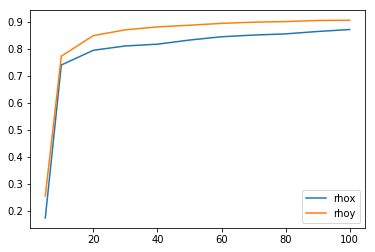

In [5]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoy)
ax2.legend(('rhox','rhoy'))

In [6]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhox, rhoz, L=example(x,z,T,tau,E,L,emsemble)

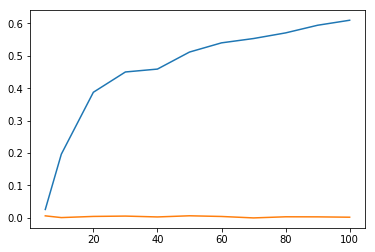

In [7]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)

In [8]:
E=3
tau=1
T=4000
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50

rhoy, rhoz, L=example(y,z,T,tau,E,L,emsemble)

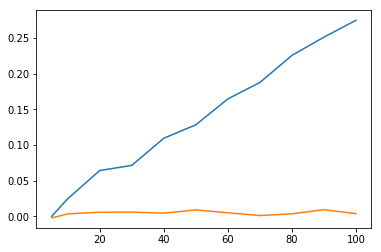

In [9]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhoy)
ax2.plot(L,rhoz)

From this test it is possible to see that from the variable z it is not possible to predict x and y. This is due to the fact the x and y are multiplying each other in the z variable which makes it hard to seperate the effect of each of this variables. Which is what we were expecting from the literature. 

## Ephemeral regimes in a coupled dynamic system

In [10]:
# Parameters
T=8000
E=3
tau=1
rx=3.8
ry=3.5
betaxy=0.02 # how much y influences x
betayx=0.1 # how much x influences y 

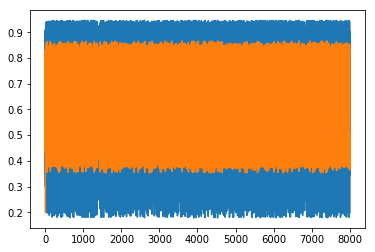

In [11]:
x=np.zeros((T))
y=np.zeros((T))
x[0]=0.4
y[0]=0.2

for i in range(T-1):
    x[i+1]=x[i]*(rx-rx*x[i]-betaxy*y[i])
    y[i+1]=y[i]*(ry-ry*y[i]-betayx*x[i])

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)

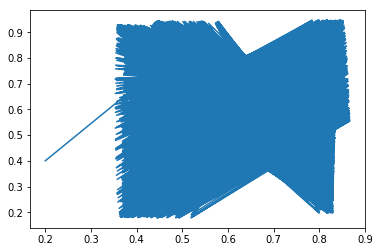

In [12]:
fig=plt.figure()
plt.plot(y,x)


In [13]:
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500, 1000, 1500, 2000, 2500, 3000]
emsemble=50 

rhox, rhoz, L=example(x,y,T,tau,E,L,emsemble)

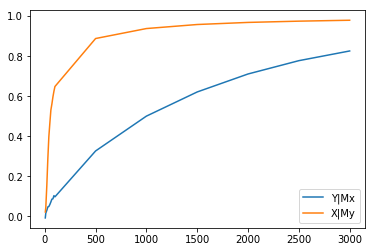

In [14]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)
plt.legend(('Y|Mx','X|My'))

## External forcing of non-coupled variables 

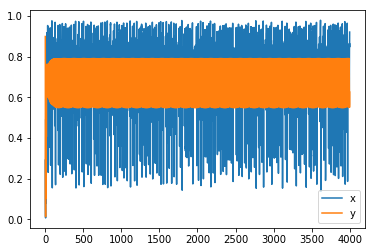

In [15]:
T=4000
x=np.zeros((T+1))
y=np.zeros((T+1))
Rx=np.zeros((T+1))
Ry=np.zeros((T+1))
n=0.9

x[0]=np.random.rand()
y[0]=np.random.rand()

for i in range(T):
    Rx[i+1]=x[i]*(3.1*(1-x[i]))*np.exp(-0.3*n)
    Ry[i+1]=y[i]*(2.9*(1-y[i]))*np.exp(-0.36*n)
    if i < 3:
        x[i+1]=0.4*x[i]
        y[i+1]=0.35*y[i]
    else:
        x[i+1]=0.4*x[i]+np.max(Rx[i-3],0)
        y[i+1]=0.35*y[i]+np.max(Ry[i-3],0)

x=np.transpose(x)
y=np.transpose(y)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(x)
ax.plot(y)
plt.legend(('x','y','Rx','Ry'))

In [16]:
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50 
tau=1
E=3

rhox, rhoz, L=example(x,y,T,tau,E,L,emsemble)

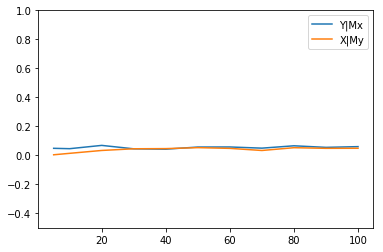

In [18]:
fig2=plt.figure()
ax2=fig2.add_subplot(111)
ax2.plot(L,rhox)
ax2.plot(L,rhoz)
plt.ylim(-.5, 1)
plt.legend(('Y|Mx','X|My'))

## Test for efficiency

In [3]:
# Parameters
T=4000 #sequence size
sigma=10
beta=8/3
rho=28
dt=0.01

x=np.zeros((T+1))
y=np.zeros((T+1))
z=np.zeros((T+1))
x[0]=0.2*(np.random.rand()-0.5)
y[0]=0.2*(np.random.rand()-0.5)
z[0]=0.2*(np.random.rand()-0.5)

for i in range(T):
    x[i+1]=x[i]+dt*sigma*(y[i]-x[i])
    y[i+1]=y[i]+dt*(x[i]*(rho-z[i])-y[i])
    z[i+1]=z[i]+dt*(x[i]*y[i]-beta*z[i])

In [ ]:
L=[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
emsemble=50 
tau=1
E=3

rhox, rhoz, L=example(x,y,T,tau,E,L,emsemble)

Build shadow manifold
Elapsed time is 0.012730 seconds.
Select L points from shadow manifold
Elapsed time is 0.000134 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.401594 seconds.
Compute weights and prediction
Elapsed time is 0.114690 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.444647 seconds.
Compute weights and prediction
Elapsed time is 0.111455 seconds.
Build shadow manifold
Elapsed time is 0.017126 seconds.
Select L points from shadow manifold
Elapsed time is 0.000037 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.464316 seconds.
Compute weights and prediction
Elapsed time is 0.112605 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.393348 seconds.
Compute weights and prediction
Elapsed time is 0.115152 seconds.
Build shadow manifold
Elapsed time is 0.013304 seconds.
Select L points from shadow manifold
E

Elapsed time is 1.464689 seconds.
Compute weights and prediction
Elapsed time is 0.114023 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.436244 seconds.
Compute weights and prediction
Elapsed time is 0.109860 seconds.
Build shadow manifold
Elapsed time is 0.012807 seconds.
Select L points from shadow manifold
Elapsed time is 0.000104 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.426979 seconds.
Compute weights and prediction
Elapsed time is 0.113966 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.408865 seconds.
Compute weights and prediction
Elapsed time is 0.111884 seconds.
Build shadow manifold
Elapsed time is 0.013007 seconds.
Select L points from shadow manifold
Elapsed time is 0.000193 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.418630 seconds.
Compute weights and prediction
Elapsed time is 0.113290 seco

Elapsed time is 1.397075 seconds.
Compute weights and prediction
Elapsed time is 0.110032 seconds.
Build shadow manifold
Elapsed time is 0.012934 seconds.
Select L points from shadow manifold
Elapsed time is 0.000093 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.420669 seconds.
Compute weights and prediction
Elapsed time is 0.113598 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.413856 seconds.
Compute weights and prediction
Elapsed time is 0.113222 seconds.
Build shadow manifold
Elapsed time is 0.013006 seconds.
Select L points from shadow manifold
Elapsed time is 0.000191 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.413049 seconds.
Compute weights and prediction
Elapsed time is 0.113358 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.406554 seconds.
Compute weights and prediction
Elapsed time is 0.111488 seco

Elapsed time is 1.426237 seconds.
Compute weights and prediction
Elapsed time is 0.114245 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.414876 seconds.
Compute weights and prediction
Elapsed time is 0.113340 seconds.
Build shadow manifold
Elapsed time is 0.013355 seconds.
Select L points from shadow manifold
Elapsed time is 0.000184 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.425978 seconds.
Compute weights and prediction
Elapsed time is 0.114026 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.411053 seconds.
Compute weights and prediction
Elapsed time is 0.114486 seconds.
Build shadow manifold
Elapsed time is 0.013083 seconds.
Select L points from shadow manifold
Elapsed time is 0.000122 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.425422 seconds.
Compute weights and prediction
Elapsed time is 0.114857 seco

Elapsed time is 1.418286 seconds.
Compute weights and prediction
Elapsed time is 0.111270 seconds.
Build shadow manifold
Elapsed time is 0.012910 seconds.
Select L points from shadow manifold
Elapsed time is 0.000078 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.427537 seconds.
Compute weights and prediction
Elapsed time is 0.111863 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.420157 seconds.
Compute weights and prediction
Elapsed time is 0.114997 seconds.
Build shadow manifold
Elapsed time is 0.013055 seconds.
Select L points from shadow manifold
Elapsed time is 0.000115 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.425483 seconds.
Compute weights and prediction
Elapsed time is 0.112676 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.419410 seconds.
Compute weights and prediction
Elapsed time is 0.114109 seco

Elapsed time is 1.426346 seconds.
Compute weights and prediction
Elapsed time is 0.115624 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.421369 seconds.
Compute weights and prediction
Elapsed time is 0.112216 seconds.
Build shadow manifold
Elapsed time is 0.012802 seconds.
Select L points from shadow manifold
Elapsed time is 0.000145 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.435706 seconds.
Compute weights and prediction
Elapsed time is 0.112865 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.414111 seconds.
Compute weights and prediction
Elapsed time is 0.126739 seconds.
Build shadow manifold
Elapsed time is 0.012953 seconds.
Select L points from shadow manifold
Elapsed time is 0.000197 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.459015 seconds.
Compute weights and prediction
Elapsed time is 0.120576 seco

Elapsed time is 1.457676 seconds.
Compute weights and prediction
Elapsed time is 0.113769 seconds.
Build shadow manifold
Elapsed time is 0.012914 seconds.
Select L points from shadow manifold
Elapsed time is 0.000244 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.444301 seconds.
Compute weights and prediction
Elapsed time is 0.114057 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.447189 seconds.
Compute weights and prediction
Elapsed time is 0.114786 seconds.
Build shadow manifold
Elapsed time is 0.013420 seconds.
Select L points from shadow manifold
Elapsed time is 0.000220 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.455992 seconds.
Compute weights and prediction
Elapsed time is 0.112813 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.445301 seconds.
Compute weights and prediction
Elapsed time is 0.114197 seco

Elapsed time is 1.462984 seconds.
Compute weights and prediction
Elapsed time is 0.115069 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.457122 seconds.
Compute weights and prediction
Elapsed time is 0.113471 seconds.
Build shadow manifold
Elapsed time is 0.012979 seconds.
Select L points from shadow manifold
Elapsed time is 0.000123 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.460678 seconds.
Compute weights and prediction
Elapsed time is 0.111052 seconds.
Starting prediction of X from Y...
Finding nearest neighbors...
Elapsed time is 1.433499 seconds.
Compute weights and prediction
Elapsed time is 0.117452 seconds.
Build shadow manifold
Elapsed time is 0.012813 seconds.
Select L points from shadow manifold
Elapsed time is 0.000199 seconds.
Starting prediction of Y from X...
Finding nearest neighbors...
Elapsed time is 1.472827 seconds.
Compute weights and prediction
Elapsed time is 0.112643 seco